# 1.2 Stata概貌

## 1.2.3 一些最基本的Stata命令

### 编辑和浏览数据

In [6]:
sysuse auto.dta, clear
format price wei len mpg %6.3f //定义变量的显示格式


(1978 Automobile Data)



In [7]:
list price wei len mpg in 1/10


     +----------------------------------------+
     |    price     weight    length      mpg |
     |----------------------------------------|
  1. | 4099.000   2930.000   186.000   22.000 |
  2. | 4749.000   3350.000   173.000   17.000 |
  3. | 3799.000   2640.000   168.000   22.000 |
  4. | 4816.000   3250.000   196.000   20.000 |
  5. | 7827.000   4080.000   222.000   15.000 |
     |----------------------------------------|
  6. | 5788.000   3670.000   218.000   18.000 |
  7. | 4453.000   2230.000   170.000   26.000 |
  8. | 5189.000   3280.000   200.000   20.000 |
  9. |  1.0e+04   3880.000   207.000   16.000 |
 10. | 4082.000   3400.000   200.000   19.000 |
     +----------------------------------------+


### 产生新变量和修改旧变量

In [8]:
gen lnprice = ln(price)
label variable lnprice "ln(汽车价格-price)" // 添加变量标签

In [10]:
gen Yesbad = 0
replace Yesbad=1 if rep78>=4  // 生成虚拟变量的方法1



(34 real changes made)


In [11]:
// 生成虚拟变量方法2
gen Yesbad2 = (rep78>=4) // 条件为真取1，否则为0
list Yes* in 1/10




     +------------------+
     | Yesbad   Yesbad2 |
     |------------------|
  1. |      0         0 |
  2. |      0         0 |
  3. |      1         1 |
  4. |      0         0 |
  5. |      1         1 |
     |------------------|
  6. |      0         0 |
  7. |      1         1 |
  8. |      0         0 |
  9. |      0         0 |
 10. |      0         0 |
     +------------------+


### 基本统计量

In [12]:
sysuse nlsw88.dta, clear
des // des2是一个更高级的方法，可以生成数字文字对应表


(NLSW, 1988 extract)


Contains data from /Applications/Stata/ado/base/n/nlsw88.dta
  obs:         2,246                          NLSW, 1988 extract
 vars:            17                          1 May 2018 22:52
                                              (_dta has notes)
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
idcode          int     %8.0g                 NLS id
age             byte    %8.0g                 age in current year
race            byte    %8.0g      racelbl    race
married         byte    %8.0g      marlbl     married
never_married   byte    %8.0g                 never married
grade           byte    %8.0g                 current grade completed
collgrad        byte    %16.0g     gradlbl    college graduate
south           byte    %8.0g              

In [14]:
sysuse auto.dta, clear
codebook  // 数据概览


(1978 Automobile Data)


--------------------------------------------------------------------------------
make                                                              Make and Model
--------------------------------------------------------------------------------

                  type:  string (str18), but longest is str17

         unique values:  74                       missing "":  0/74

              examples:  "Cad. Deville"
                         "Dodge Magnum"
                         "Merc. XR-7"
                         "Pont. Catalina"


--------------------------------------------------------------------------------
price                                                                      Price
--------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [3291,15906]                 units:  1
         unique values:  74                       missing .:  0/74

                  me

In [15]:
compress // 自动精简资料的存储格式

  variable mpg was int now byte
  variable rep78 was int now byte
  variable trunk was int now byte
  variable turn was int now byte
  variable make was str18 now str17
  (370 bytes saved)


In [16]:
sum // summarize,基本统计量


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        make |          0
       price |         74    6165.257    2949.496       3291      15906
         mpg |         74     21.2973    5.785503         12         41
       rep78 |         69    3.405797    .9899323          1          5
    headroom |         74    2.993243    .8459948        1.5          5
-------------+---------------------------------------------------------
       trunk |         74    13.75676    4.277404          5         23
      weight |         74    3019.459    777.1936       1760       4840
      length |         74    187.9324    22.26634        142        233
        turn |         74    39.64865    4.399354         31         51
displacement |         74    197.2973    91.83722         79        425
-------------+---------------------------------------------------------
  gear_ratio |         74    3.014865

In [17]:
fsum, s(mean sd p50 min max) cat(rep78 foreign) label // 外部命令，很好用


      Variable |        N     Mean       SD   Median      Min      Max                                                                                                                     
---------------+------------------------------------------------------
         price |       74  6165.26  2949.50  5006.50  3291.00 15906.00  Price
           mpg |       74    21.30     5.79    20.00    12.00    41.00  Mileage 
> (mpg)
         rep78 |       69     3.41     0.99     3.00     1.00     5.00  Repair R
> ecord 1978
        1 (%)  |        2     2.90
        2 (%)  |        8    11.59
        3 (%)  |       30    43.48
        4 (%)  |       18    26.09
        5 (%)  |       11    15.94
      headroom |       74     2.99     0.85     3.00     1.50     5.00  Headroom
>  (in.)
         trunk |       74    13.76     4.28    14.00     5.00    23.00  Trunk sp
> ace (cu. ft.)
        weight |       74  3019.46   777.19  3190.00  1760.00  4840.00  Weight (
> lbs.)
        length |       74   

In [18]:
sysuse auto, clear
bysort foreign: fsum price wei len // 分组统计


(1978 Automobile Data)


--------------------------------------------------------------------------------
-> foreign = Domestic

      Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------+---------------------------------------------
         price |       52  6072.42  3097.10  3291.00 15906.00  
        weight |       52  3317.12   695.36  1800.00  4840.00  
        length |       52   196.13    20.05   147.00   233.00  

--------------------------------------------------------------------------------
-> foreign = Foreign

      Variable |        N     Mean       SD      Min      Max                                                                                                                              
---------------+---------------------------------------------
         price |       22  6384.68  2621.92  3748.00 12990.00  
        we

In [25]:
sum2docx price wei len mpg turn foreign using sum.docx, replace ///
         stats(N mean sd median min max) // 自动导出描述性统计表格

summary statistics have been written to file sum.docx


### 列示和屏幕显示

In [26]:
sysuse auto.dta, clear
sort price // 升序排序，help gsort


(1978 Automobile Data)



In [28]:
display "差旅费="  1450*2 + 360*3

差旅费=3980


In [29]:
list price foreign in 1/20, sepby(foreign) //屏幕列示观察值


     +------------------+
     | price    foreign |
     |------------------|
  1. | 3,291   Domestic |
  2. | 3,299   Domestic |
  3. | 3,667   Domestic |
     |------------------|
  4. | 3,748    Foreign |
  5. | 3,798    Foreign |
     |------------------|
  6. | 3,799   Domestic |
  7. | 3,829   Domestic |
     |------------------|
  8. | 3,895    Foreign |
     |------------------|
  9. | 3,955   Domestic |
 10. | 3,984   Domestic |
     |------------------|
 11. | 3,995    Foreign |
     |------------------|
 12. | 4,010   Domestic |
 13. | 4,060   Domestic |
 14. | 4,082   Domestic |
 15. | 4,099   Domestic |
 16. | 4,172   Domestic |
 17. | 4,181   Domestic |
 18. | 4,187   Domestic |
 19. | 4,195   Domestic |
     |------------------|
 20. | 4,296    Foreign |
     +------------------+


In [32]:
*- Also see
*-   help  rsort  // randomly sort,把数据打乱，随机排序，外部命令
*-   help gsort // 逆序

### 相关系数矩阵

In [33]:
pwcorr price wei len mpg


             |    price   weight   length      mpg
-------------+------------------------------------
       price |   1.0000 
      weight |   0.5386   1.0000 
      length |   0.4318   0.9460   1.0000 
         mpg |  -0.4686  -0.8072  -0.7958   1.0000 


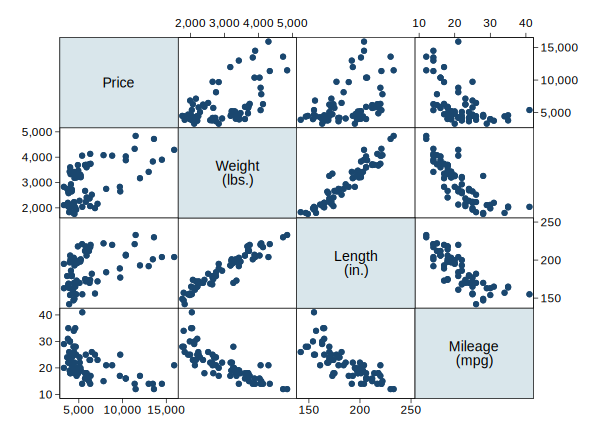

In [36]:
set scheme vg_s2cx
graph matrix price wei len mpg

### 直方图和密度函数图

In [37]:
sysuse nlsw88.dta, clear

(NLSW, 1988 extract)


(bin=33, start=1.0049518, width=1.2042921)


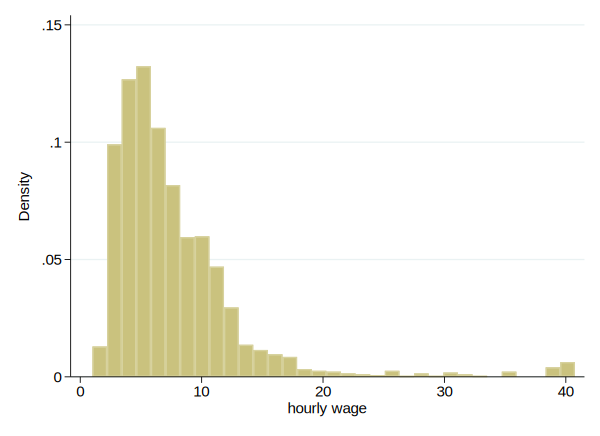

In [38]:
histogram wage  // 直方图

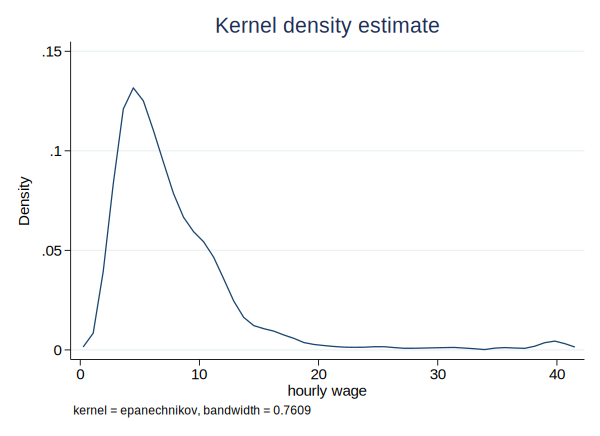

In [39]:
kdensity  wage // 核密度函数图

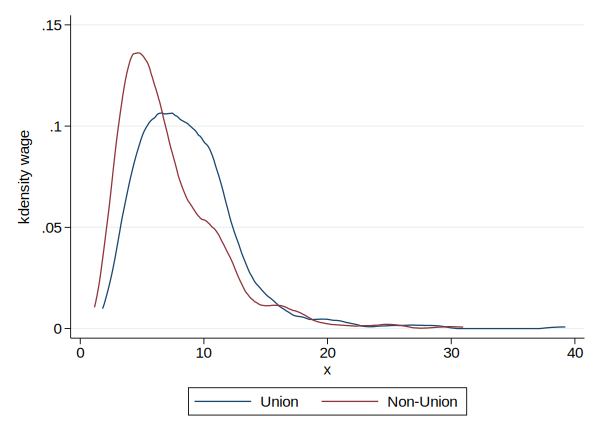

In [40]:
twoway (kdensity wage if union==1)  ///
       (kdensity wage if union==0), ///
       legend(label(1 "Union") label(2 "Non-Union"))

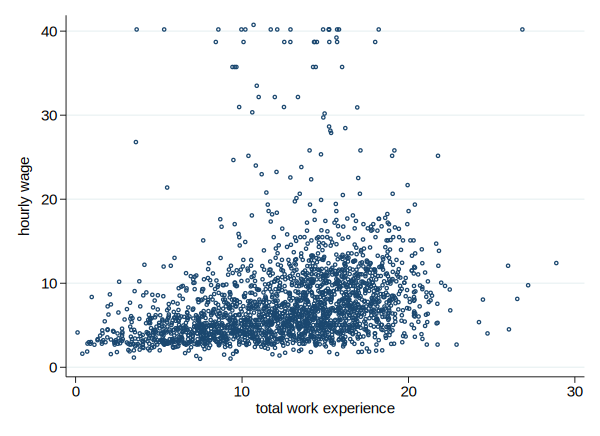

In [43]:
twoway scatter wage ttl_exp, msymbol(Oh) msize(*0.5)

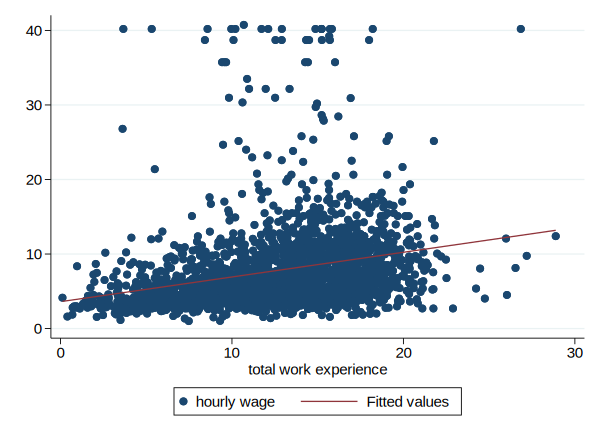

In [44]:
twoway (scatter wage ttl_exp) (lfit wage ttl_exp) // 散点图+线性拟合图

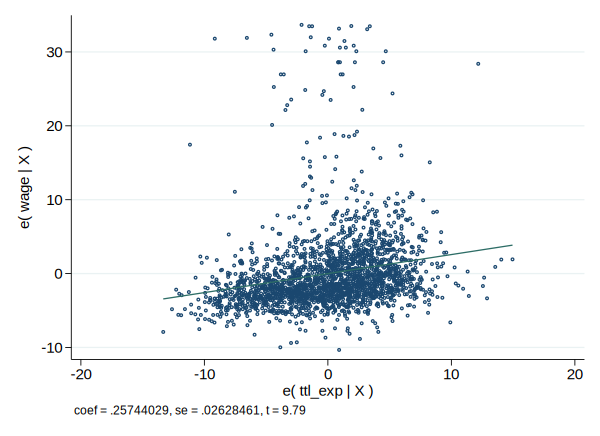

In [45]:
qui reg wage ttl_exp hours i.race i.industry
avplot ttl_exp, m(Oh) msize(*0.4)

In [52]:
* Also see
* help baselinetable
* help avplot
* help avplots
* help avciplot

### 类变量列表分析

In [46]:
sysuse auto.dta, clear
count if price > 10000 // 计数


(1978 Automobile Data)

  10


In [47]:
tab foreign // 列表呈现频数


   Car type |      Freq.     Percent        Cum.
------------+-----------------------------------
   Domestic |         52       70.27       70.27
    Foreign |         22       29.73      100.00
------------+-----------------------------------
      Total |         74      100.00


In [48]:
tab foreign rep78 // 二维列表


           |                   Repair Record 1978
  Car type |         1          2          3          4          5 |     Total
-----------+-------------------------------------------------------+----------
  Domestic |         2          8         27          9          2 |        48 
   Foreign |         0          0          3          9          9 |        21 
-----------+-------------------------------------------------------+----------
     Total |         2          8         30         18         11 |        69 


In [50]:
tab foreign rep78, sum(price) 


            Means, Standard Deviations and Frequencies of Price

           |                Repair Record 1978
  Car type |         1          2          3          4          5 |     Total
-----------+-------------------------------------------------------+----------
  Domestic |   4,564.5  5,967.625  6,607.074  5,881.556    4,204.5 |  6,179.25
           | 522.55191  3,579.357  3,661.267  1,592.019  311.83409 | 3,188.969
           |         2          8         27          9          2 |        48
-----------+-------------------------------------------------------+----------
   Foreign |         .          .  4,828.667  6,261.444  6,292.667 | 6,070.143
           |         .          .  1,285.613  1,896.092  2,765.629 | 2,220.984
           |         0          0          3          9          9 |        21
-----------+-------------------------------------------------------+----------
     Total |   4,564.5  5,967.625  6,429.233    6,071.5      5,913 | 6,146.043
           | 522.5

In [51]:
tab foreign rep78, sum(price) mean


                              Means of Price

           |                Repair Record 1978
  Car type |         1          2          3          4          5 |     Total
-----------+-------------------------------------------------------+----------
  Domestic |   4,564.5  5,967.625  6,607.074  5,881.556    4,204.5 |  6,179.25
   Foreign |         .          .  4,828.667  6,261.444  6,292.667 | 6,070.143
-----------+-------------------------------------------------------+----------
     Total |   4,564.5  5,967.625  6,429.233    6,071.5      5,913 | 6,146.043


### 均值差异性检查

In [53]:
ttest price, by(foreign)


Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. Err.   Std. Dev.   [95% Conf. Interval]
---------+--------------------------------------------------------------------
Domestic |      52    6072.423    429.4911    3097.104    5210.184    6934.662
 Foreign |      22    6384.682    558.9942    2621.915     5222.19    7547.174
---------+--------------------------------------------------------------------
combined |      74    6165.257    342.8719    2949.496    5481.914      6848.6
---------+--------------------------------------------------------------------
    diff |           -312.2587    754.4488               -1816.225    1191.708
------------------------------------------------------------------------------
    diff = mean(Domestic) - mean(Foreign)                         t =  -0.4139
Ho: diff = 0                                     degrees of freedom =       72

    Ha: dif

In [54]:
ttable2 price mpg wei len, by(foreign)


--------------------------------------------------------------------------
Variables   G1(Domestic)     Mean1     G2(Foreign)    Mean2      MeanDiff
--------------------------------------------------------------------------
price         52           6072.423       22        6384.682   -312.259
mpg           52             19.827       22          24.773     -4.946***
weight        52           3317.115       22        2315.909   1001.206***
length        52            196.135       22         168.545     27.589***
--------------------------------------------------------------------------


### 变量名称和修改观测值

In [55]:
lookfor "Repair" // 搜索包含特定关键词的变量，对于CHFS、CFPS数据库非常有用


              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
rep78           int     %8.0g                 Repair Record 1978


In [56]:
rename weight wei  // 单个变量名更名

In [57]:
rename (length  gear_ratio) (len gr) // 批量重命名

In [59]:
drop turn gr make  // 删除变量

In [61]:
drop if rep78 == .   // 删除观测缺失值

(5 observations deleted)


In [62]:
replace price=15000 if price>15000

(1 real change made)


### 帮助文件及外部命令的获取

In [ ]:
findit dynamic panel // 搜索关键词，下载外部命令

In [ ]:
help  regress // 查看Stata内部命令的帮助文件

In [65]:
ssc install winsor2, replace // 直接下载ssc网站的外部命令

checking winsor2 consistency and verifying not already installed...
all files already exist and are up to date.


### 基本回归分析

In [67]:
sysuse nlsw88.dta, clear
global y "wage"  // 存放被解释变量的全局暂元
global x "hours tenure married collgrad"


(NLSW, 1988 extract)




#### 去除缺漏值

In [68]:
qui reg $y $x i.race i.industry i.occupation
keep if e(sample)



(37 observations deleted)


#### 输出描述性统计量

In [70]:
sum2docx $y $x using sum1.docx, replace stats(N mean sd min median max) 

summary statistics have been written to file sum1.docx


#### 输出相关性分析表

In [71]:
corr2docx $y $x using corr1.docx, replace star spearman(ignore)

correlation matrix have been written to file corr1.docx


#### 回归分析：基本版本

In [77]:
qui reg $y $x  // OLS回归，basic model
   est store m1
qui reg $y $x i.race  
   est store m2
qui reg $y $x i.race i.industry
   est store m3
qui reg $y $x i.race i.occupation
   est store m4
reg2docx m1 m2 m3 m4 using reg1.docx, replace ///
         scalars(N) b(%6.3f) indicate("行业效应=*.industry" "职业效应=*.occupation")










regression table have been written to file reg1.docx
